# **SALARY PREDICTIONS OF DATA PROFESSIONS**

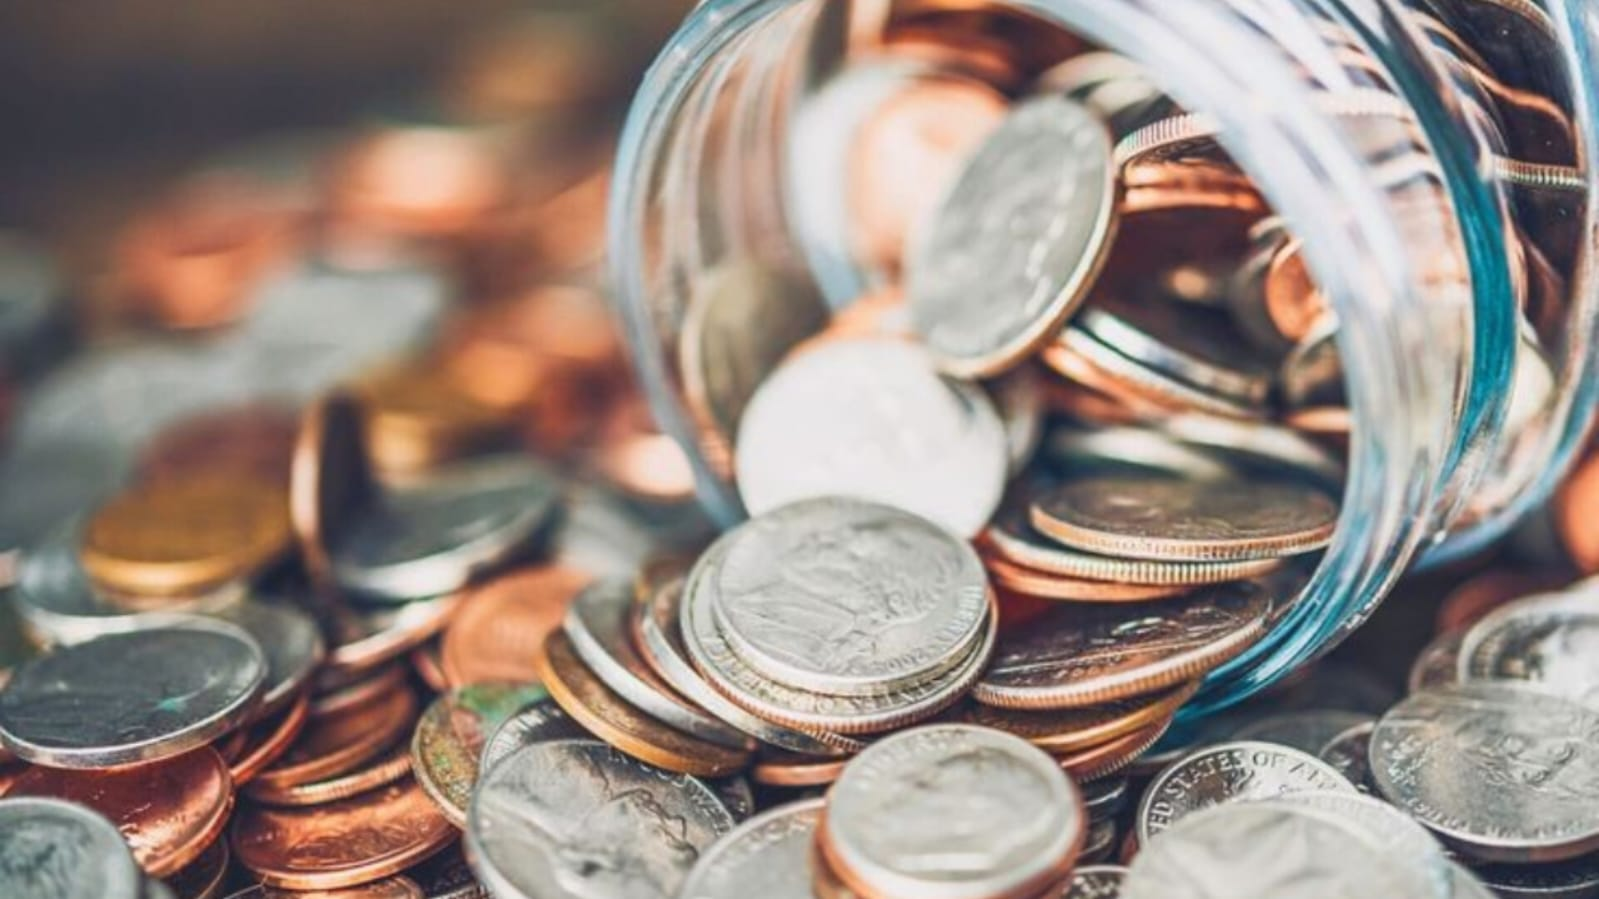

#**DATA DESCRIPTION**
**The dataset consists of 2639 entries and 13 columns.This is clearly a Regression problem and we will train the regression models to predict the desired outputs. Here's a summary of the columns:**

**FIRST NAME**: First name of the employee

**LAST NAME**: Last name of the employee

**SEX**: Gender of the employee

**DOJ**: Date of joining

**CURRENT DATE**: Current date

**DESIGNATION**: Job title of the employee

**AGE**: Age of the employee

**SALARY**: Salary of the employee **(this is our target variable)**

**UNIT**: Department/unit of the employee

**LEAVES USED**: Number of leaves used by the employee

**LEAVES REMAINING**: Number of leaves remaining for the employee

**RATINGS**: Performance rating of the employee

**PAST EXP**: Past experience of the employee in years

#**PROBLEM STATEMENT**
###**Salaries in the field of data professions vary widely based on factors such as experience, job role, and performance. Accurately predicting salaries for data professionals is essential for both job seekers and employers.**

#**Based on the problem statement its clear that we have to create SUPERVISED MACHINE LEARNING REGRESSION MODEL as the target variable is continuos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('/content/Salary Prediction of Data Professions.csv')
df.head().style.background_gradient(cmap='Set3')

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.000000,44570,Finance,24.000000,6.000000,2.000000,0
1,ANNIE,nan,F,nan,01-07-2016,Associate,nan,89207,Web,nan,13.000000,nan,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.000000,40955,Finance,23.000000,7.000000,3.000000,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.000000,45550,IT,22.000000,8.000000,3.000000,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,nan,43161,Operations,27.000000,3.000000,nan,3


In [ ]:
df.shape

(2639, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [ ]:
#to determine unique values
for i in df.columns:
  print(i,":\n",df[i].unique())

FIRST NAME :
 ['TOMASA' 'ANNIE' 'OLIVE' ... 'RENEE' 'TERI' 'GREGORY']
LAST NAME :
 ['ARMEN' nan 'ANCY' ... 'ALVINO' 'ANASTASIO' 'ABARCA']
SEX :
 ['F' 'M']
DOJ :
 ['5-18-2014' nan '7-28-2014' '04-03-2013' '11-20-2014' '2-19-2013'
 '09-02-2013' '12-05-2013' '6-29-2014' '11-11-2014' '03-10-2014'
 '02-01-2010' '08-01-2013' '3-22-2013' '7-27-2013' '8-13-2014' '9-16-2013'
 '06-07-2014' '02-03-2013' '07-03-2013' '6-23-2013' '10-11-2013'
 '07-11-2014' '12-02-2013' '02-11-2013' '1-22-2014' '09-07-2014'
 '2-15-2013' '12-21-2014' '3-13-2013' '05-07-2013' '11-07-2014'
 '5-22-2014' '08-06-2011' '12-16-2013' '7-30-2014' '12-17-2014'
 '3-25-2013' '2-18-2013' '11-18-2014' '3-23-2014' '8-26-2011' '07-01-2014'
 '1-31-2014' '3-31-2014' '4-26-2014' '01-07-2015' '5-22-2013' '2-26-2014'
 '07-05-2013' '7-22-2013' '11-18-2013' '8-25-2014' '04-10-2014'
 '08-04-2013' '4-19-2013' '3-27-2014' '12-13-2014' '8-17-2014'
 '12-25-2013' '8-20-2013' '1-18-2015' '10-22-2013' '04-05-2013'
 '06-08-2014' '6-16-2013' '10-07-

In [ ]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [ ]:
#checking the duplicte values
df.duplicated().sum()

161

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(2478, 13)

In [ ]:
# Convert date columns to datetime objects
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
#we can extract year from the date column so we can work on the year
df['DOJ_Year']=df['DOJ'].dt.year #which creates a new column year
df['CURRENT DATE_Year']=df['CURRENT DATE'].dt.year
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DOJ_Year,CURRENT DATE_Year
0,TOMASA,ARMEN,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2014.0,2016
1,ANNIE,NaN,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,2016
2,OLIVE,ANCY,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2014.0,2016
3,CHERRY,AQUILAR,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2013.0,2016
4,LEON,ABOULAHOUD,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,2014.0,2016


##It's unlikely that the First name and last Name would have any predictive power for salary, so it can be excluded.Also remove the column DOJ and CURRENT YEAR since we have created a extra columns DOJ year and CURRENT DATE_year

In [ ]:
df.drop(['FIRST NAME','LAST NAME','DOJ','CURRENT DATE'],axis=1,inplace=True)
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DOJ_Year,CURRENT DATE_Year
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2014.0,2016
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,2016
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2014.0,2016
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2013.0,2016
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,2014.0,2016


#**Handling the missing values**

In [ ]:
df.isna().sum()

SEX                  0
DESIGNATION          0
AGE                  3
SALARY               0
UNIT                 0
LEAVES USED          3
LEAVES REMAINING     2
RATINGS              2
PAST EXP             0
DOJ_Year             1
CURRENT DATE_Year    0
dtype: int64

In [ ]:
#handle the missing values in the column doj,age leaves used ,leaves remaing,ratings
df['DOJ_Year'].fillna(df['DOJ_Year'].mode()[0],inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].mean(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].mean(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].mode()[0], inplace=True)
df.head().style.background_gradient(cmap='Set3')


,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DOJ_Year,CURRENT DATE_Year
0,F,Analyst,21.000000,44570,Finance,24.000000,6.000000,2.000000,0,2014.000000,2016
1,F,Associate,24.727273,89207,Web,22.493737,13.000000,2.000000,7,2014.000000,2016
2,F,Analyst,21.000000,40955,Finance,23.000000,7.000000,3.000000,0,2014.000000,2016
3,F,Analyst,22.000000,45550,IT,22.000000,8.000000,3.000000,0,2013.000000,2016
4,M,Analyst,24.727273,43161,Operations,27.000000,3.000000,2.000000,3,2014.000000,2016


In [ ]:
df.isna().sum()

SEX                  0
DESIGNATION          0
AGE                  0
SALARY               0
UNIT                 0
LEAVES USED          0
LEAVES REMAINING     0
RATINGS              0
PAST EXP             0
DOJ_Year             0
CURRENT DATE_Year    0
dtype: int64

In [ ]:
#covert the float columns into int
df['RATINGS'] = df['RATINGS'].astype(int)
df['AGE'] = df['AGE'].astype(int)
df['LEAVES USED'] = df['LEAVES USED'].astype(int)
df['LEAVES REMAINING'] = df['LEAVES REMAINING'].astype(int)
df['DOJ_Year'] = df['DOJ_Year'].astype(int)
df.head()


,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DOJ_Year,CURRENT DATE_Year
0,F,Analyst,21,44570,Finance,24,6,2,0,2014,2016
1,F,Associate,24,89207,Web,22,13,2,7,2014,2016
2,F,Analyst,21,40955,Finance,23,7,3,0,2014,2016
3,F,Analyst,22,45550,IT,22,8,3,0,2013,2016
4,M,Analyst,24,43161,Operations,27,3,2,3,2014,2016


In [ ]:
df.dtypes

SEX                  object
DESIGNATION          object
AGE                   int64
SALARY                int64
UNIT                 object
LEAVES USED           int64
LEAVES REMAINING      int64
RATINGS               int64
PAST EXP              int64
DOJ_Year              int64
CURRENT DATE_Year     int32
dtype: object

In [ ]:
#collect categorical columns
categorical_clm =[]
for i in df.columns:
  if df[i].dtype=='object':
    categorical_clm.append(i)
categorical_clm

['SEX', 'DESIGNATION', 'UNIT']

#**Looking at the distribution of Target variable**

---



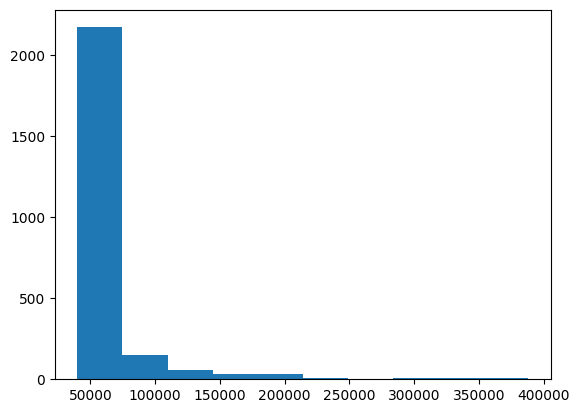

In [ ]:
#creating bar chart as the target variable is continious
plt.hist(df['SALARY'])
plt.show()

#**EXPLORATORY DATA ANALYSIS**

* Categorical variable : Bar plot , Pie plot
* Contnious variable : Histogam

In [ ]:
df['SEX'].value_counts()

SEX
F    1259
M    1219
Name: count, dtype: int64

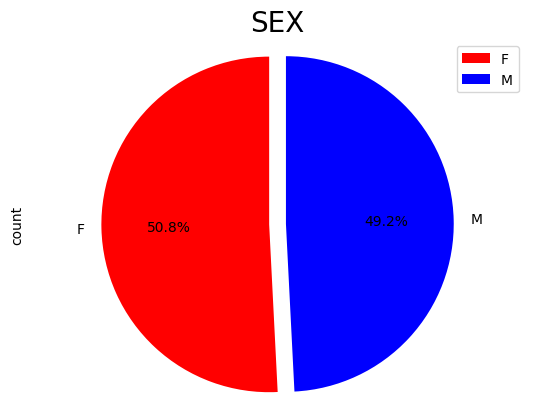

In [ ]:
#pie  chart for Has_Online_delivery
explode = (0.1, 0)
df['SEX'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['red', 'blue'],explode=explode)
plt.title('SEX',fontsize=20)
plt.axis('equal')
plt.legend(labels=df['SEX'].value_counts().index,loc='upper right')
plt.show()


In [ ]:
df['DESIGNATION'].value_counts()

DESIGNATION
Analyst           1854
Senior Analyst     301
Associate          156
Manager             79
Senior Manager      61
Director            27
Name: count, dtype: int64

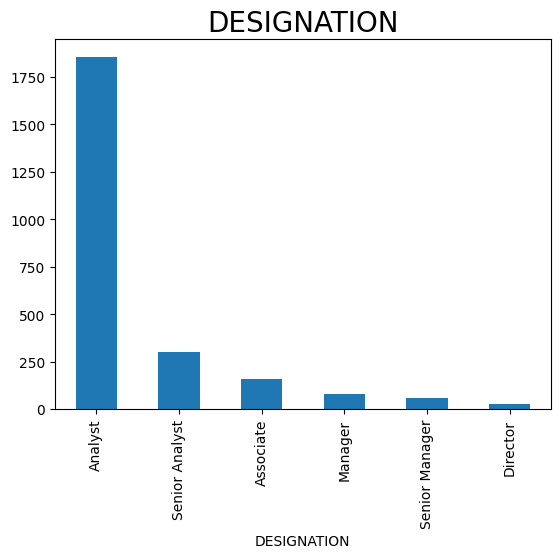

In [ ]:
#plot a bar chart for desiganation column
df['DESIGNATION'].value_counts().plot(kind='bar')
plt.title('DESIGNATION',fontsize=20)
plt.show()


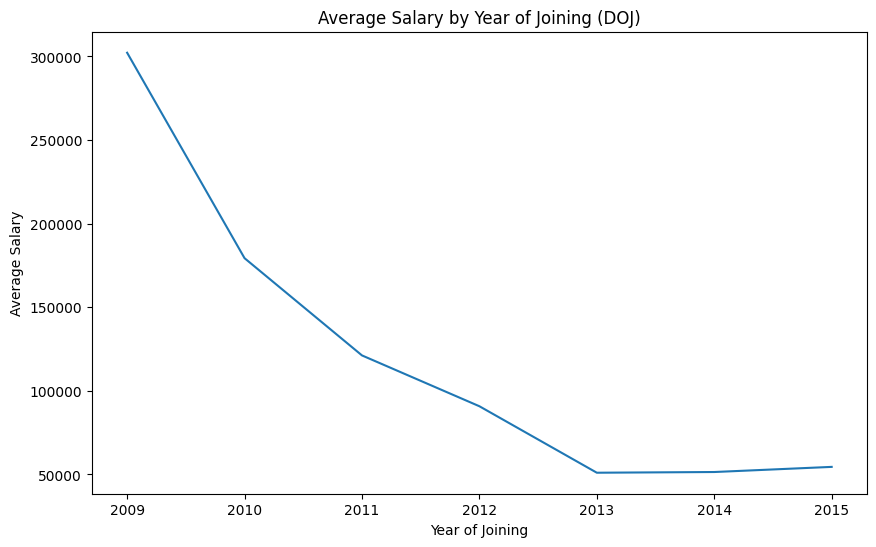

In [ ]:
# Line Plot: Average Salary by DOJ Year
plt.figure(figsize=(10, 6))
average_salary_by_year = df.groupby('DOJ_Year')['SALARY'].mean().reset_index()
sns.lineplot(data=average_salary_by_year, x='DOJ_Year', y='SALARY') # Pass the DataFrame to the 'data' parameter
plt.title('Average Salary by Year of Joining (DOJ)')
plt.xlabel('Year of Joining')
plt.ylabel('Average Salary')
plt.show()

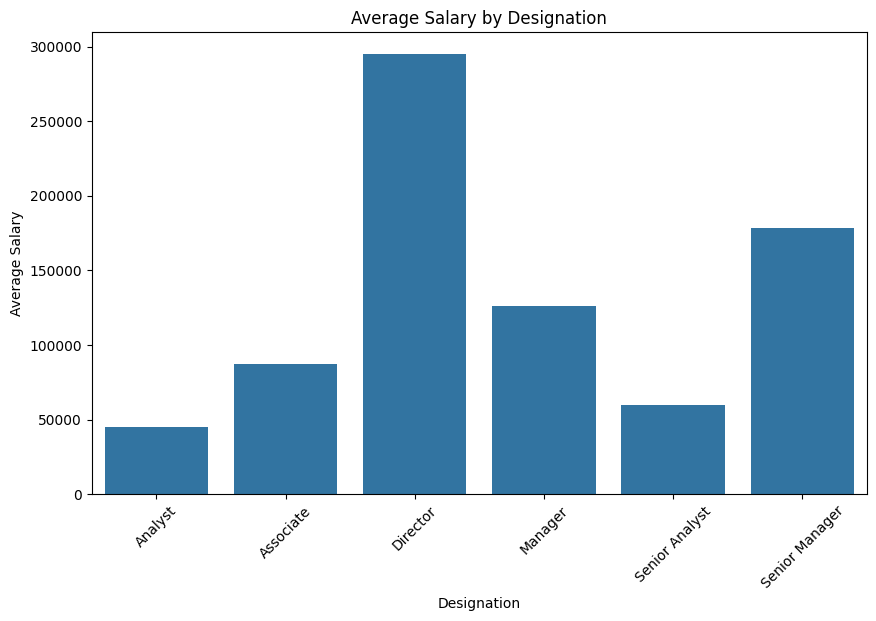

In [ ]:
# Bar Plot: Average Salary by Designation
plt.figure(figsize=(10, 6))
average_salary_by_designation = df.groupby('DESIGNATION')['SALARY'].mean().reset_index()#average salary
sns.barplot(data=average_salary_by_designation, x='DESIGNATION', y='SALARY')
plt.title('Average Salary by Designation')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

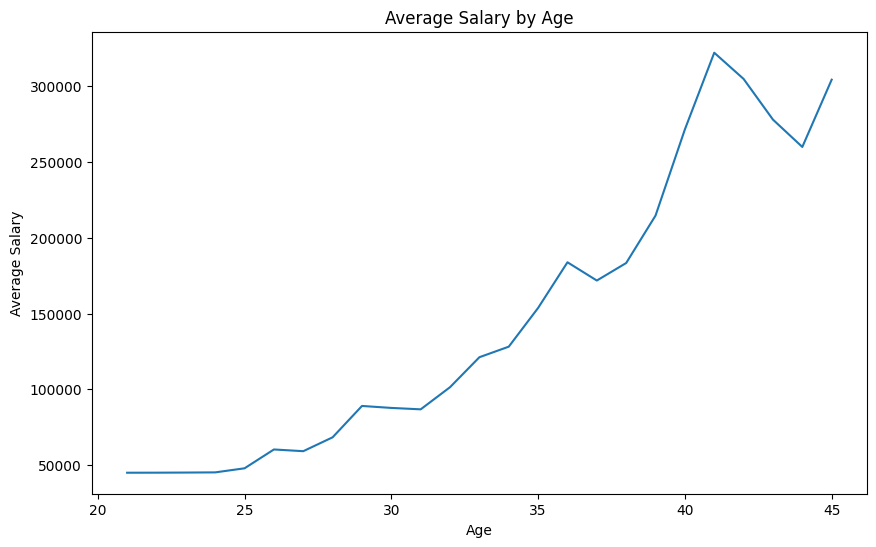

In [ ]:
# Line Plot: Average Salary by Age
plt.figure(figsize=(10, 6))
average_salary_by_age = df.groupby('AGE')['SALARY'].mean().reset_index()
sns.lineplot(data=average_salary_by_age, x='AGE', y='SALARY')
plt.title('Average Salary by Age')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.show()

##pairplot

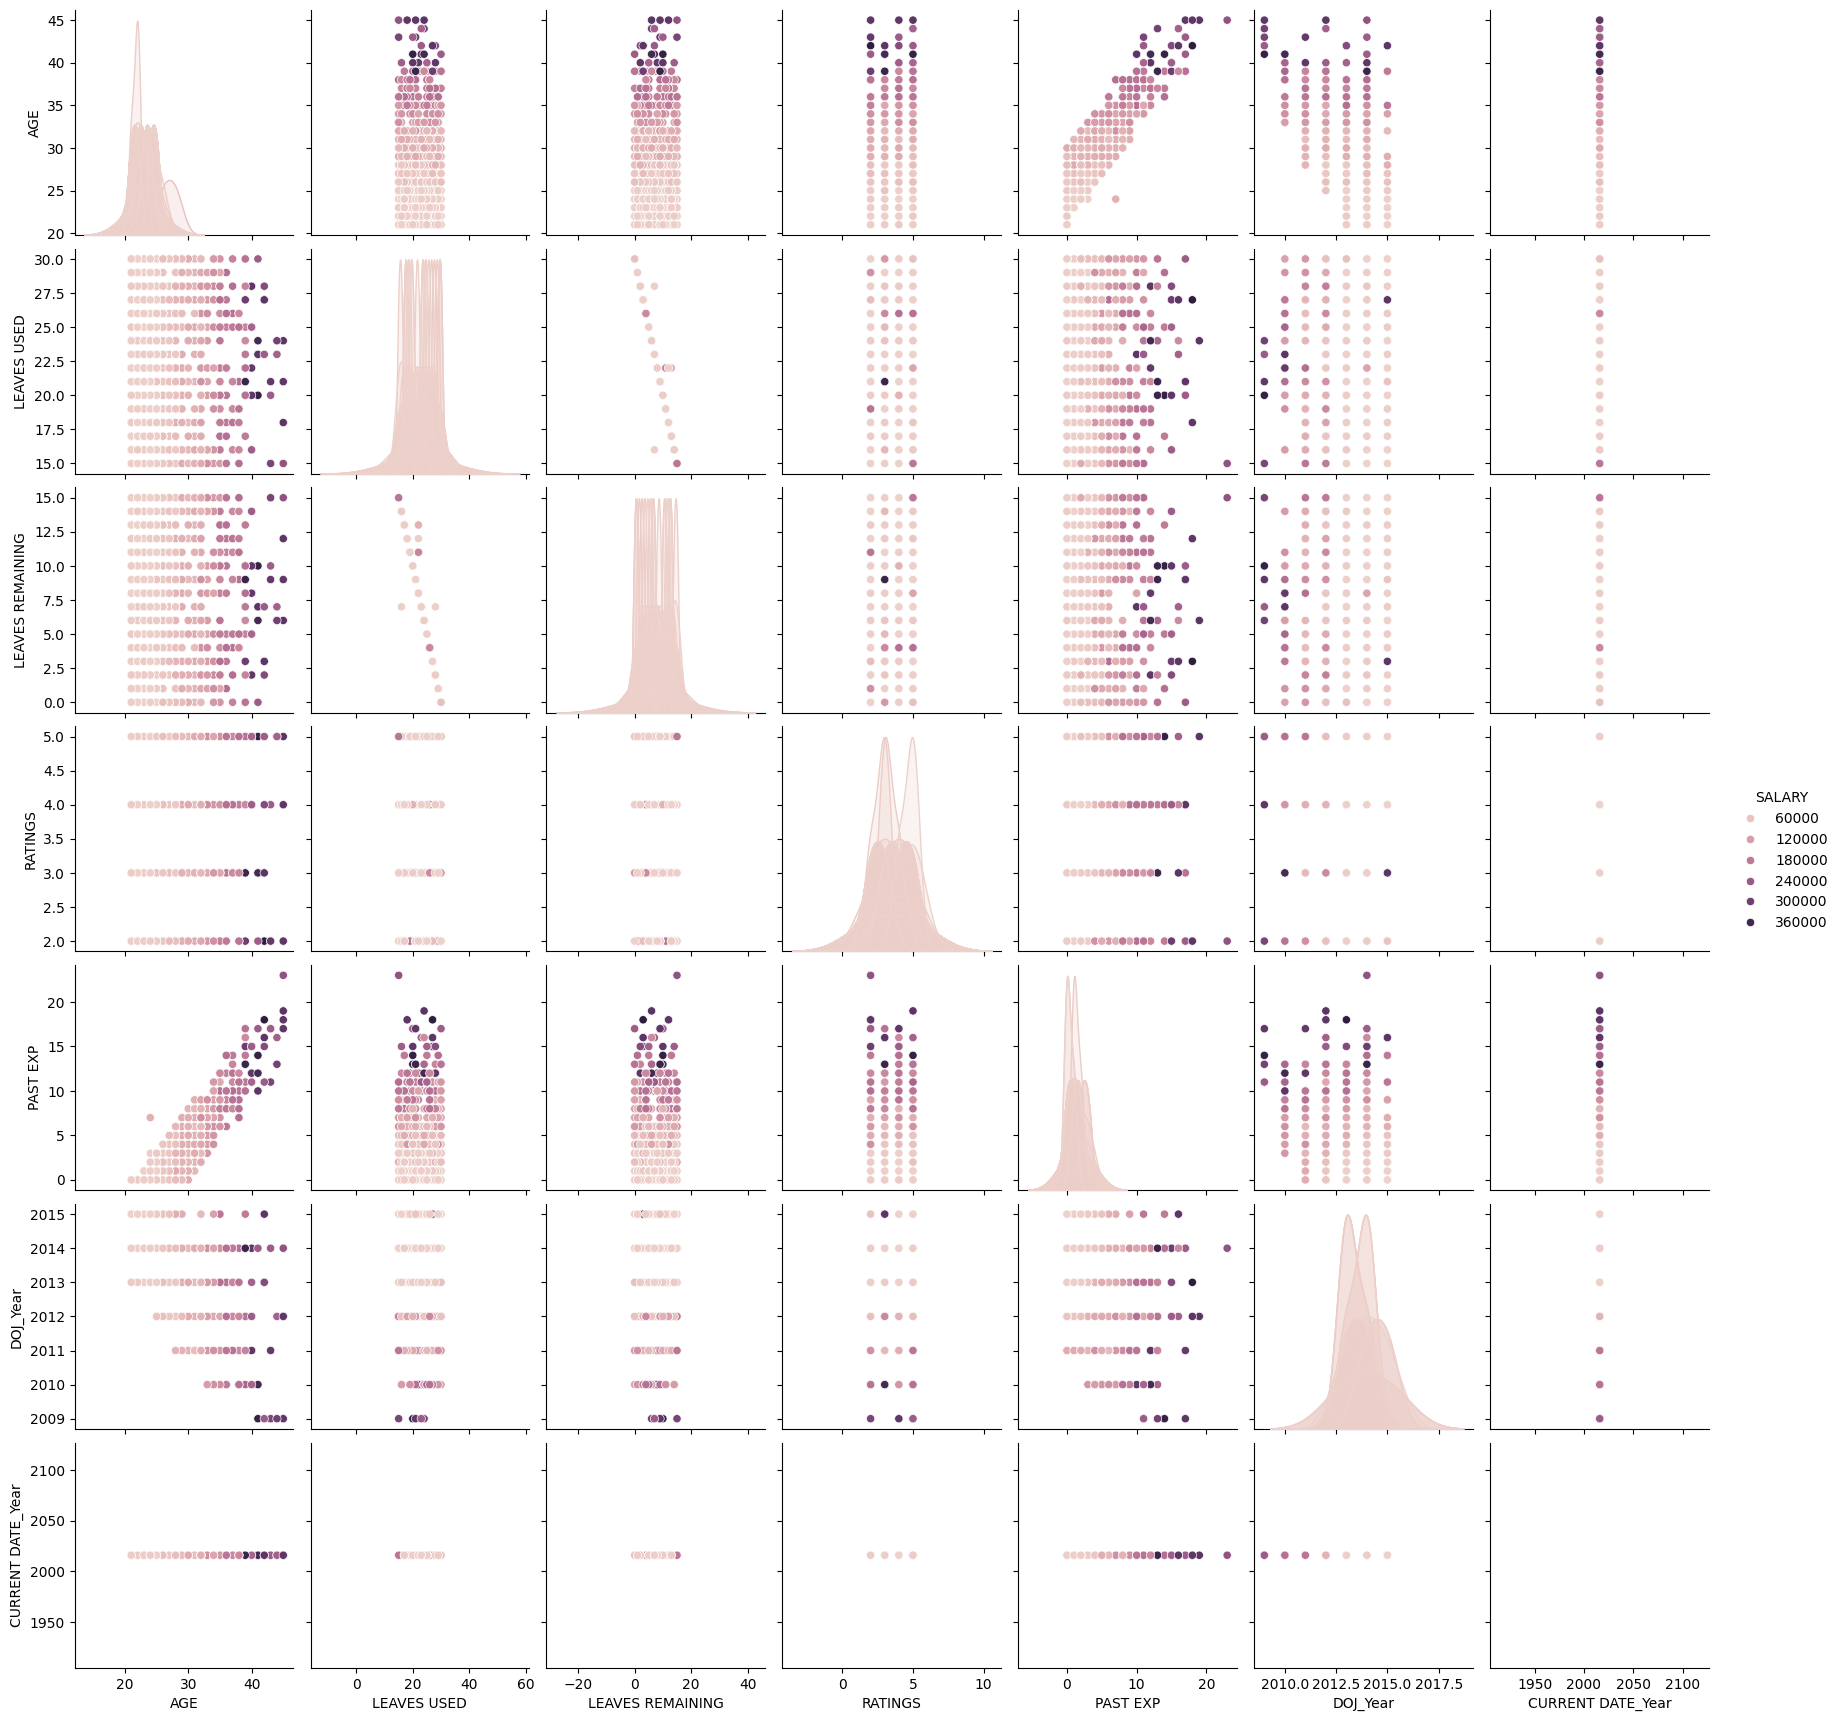

In [ ]:
sns.pairplot(df,hue='SALARY')
plt.show()

##**CHECKING IF OUTLIERS ARE PRESENT**

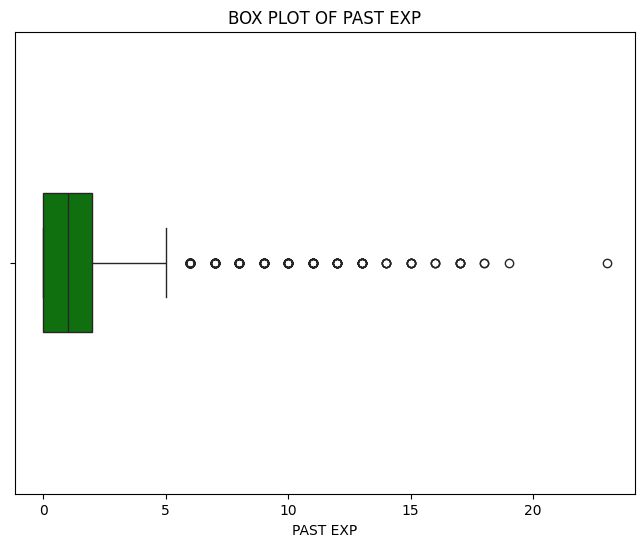

In [ ]:
#box plot of Votes
plt.figure(figsize=(8,6))
sns.boxplot(x='PAST EXP',data=df,orient='h',width=0.3,color='GREEN')
plt.title('BOX PLOT OF PAST EXP')
plt.show()

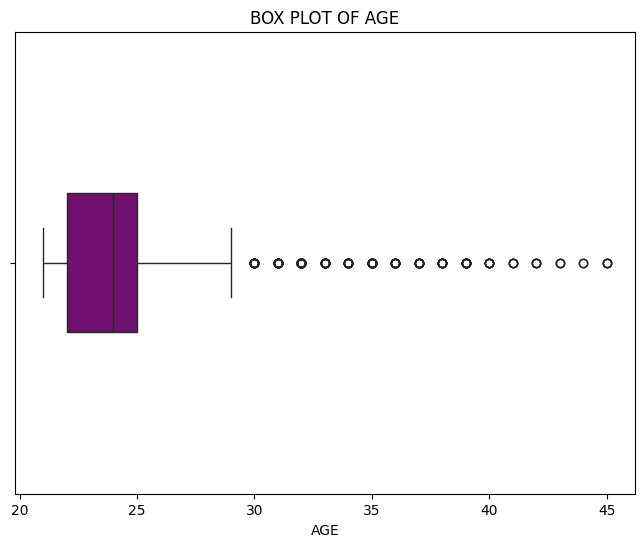

In [ ]:
#box plot of Votes
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE',data=df,orient='h',width=0.3,color='purple')
plt.title('BOX PLOT OF AGE')
plt.show()

#**OUTLIER REMOVAL**
###**Outliers are extreme values in data which are far away from the most of values**

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]

# Removing outliers for the 'Votes' column
df = remove_outliers_iqr(df,'PAST EXP')
# Removing outliers for the 'Average Cost For Two' column
df = remove_outliers_iqr(df,'AGE')

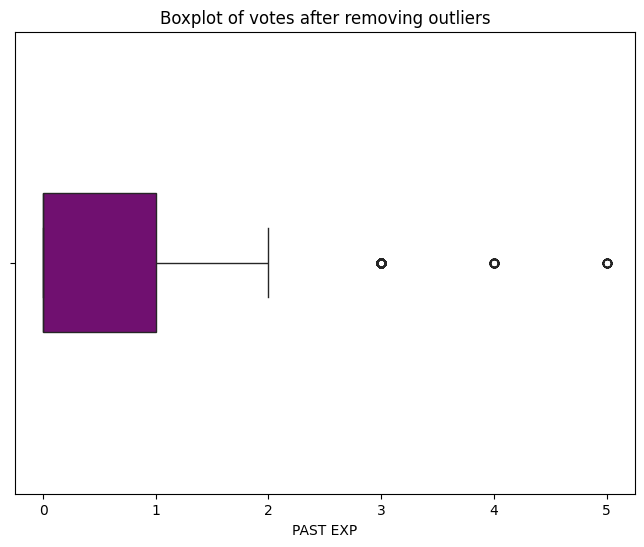

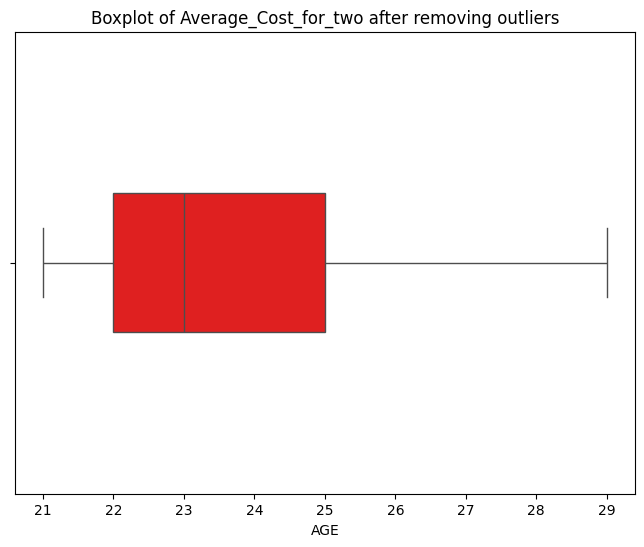

In [ ]:
# Box plot of Votes after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='PAST EXP',data=df,orient='h',width=0.3,color='purple')
plt.title('Boxplot of votes after removing outliers')
plt.show()
#Box plot of Average_Cost_for_two after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE',data=df,orient='h',width=0.3,color='red')
plt.title('Boxplot of Average_Cost_for_two after removing outliers')
plt.show()


##**CALCULATING THE CORRELATION**

In [ ]:
# Selecting the numerical columns before calculating correlations
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()
corr_matrix

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DOJ_Year,CURRENT DATE_Year
AGE,1.000000,0.644216,-0.000563,0.001900,0.023214,0.673610,-0.261582,NaN
SALARY,0.644216,1.000000,0.009471,-0.009604,-0.023631,0.297078,-0.336157,NaN
LEAVES USED,-0.000563,0.009471,1.000000,-0.999034,0.008545,-0.005514,-0.009092,NaN
LEAVES REMAINING,0.001900,-0.009604,-0.999034,1.000000,-0.009603,0.006260,0.007966,NaN
RATINGS,0.023214,-0.023631,0.008545,-0.009603,1.000000,0.028618,0.012067,NaN
PAST EXP,0.673610,0.297078,-0.005514,0.006260,0.028618,1.000000,0.174922,NaN
DOJ_Year,-0.261582,-0.336157,-0.009092,0.007966,0.012067,0.174922,1.000000,NaN
CURRENT DATE_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


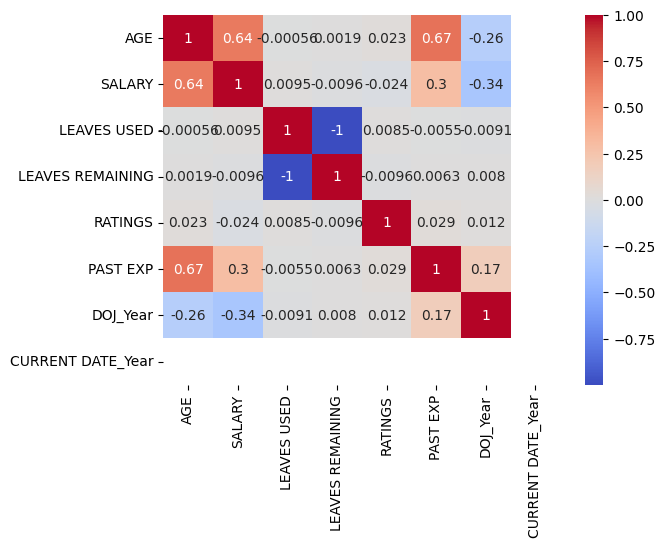

In [ ]:
#heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


###**Attributes, such as RATINGS , DOJ_Year and	CURRENT DATE_Year do not show significant correlationwith most of the other variables, indicating weak relationships.**

In [ ]:
df.drop(['RATINGS','DOJ_Year','CURRENT DATE_Year'],axis=1,inplace=True)
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,PAST EXP
0,F,Analyst,21,44570,Finance,24,6,0
2,F,Analyst,21,40955,Finance,23,7,0
3,F,Analyst,22,45550,IT,22,8,0
4,M,Analyst,24,43161,Operations,27,3,3
5,F,Analyst,22,48736,Marketing,20,10,0


#**DATA PRE-PROCESSING**
##**ENCODING ALL CATEGORICAL VALUES USING LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_clm:
  df[i]=le.fit_transform(df[i])
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,PAST EXP
0,0,0,21,44570,0,24,6,0
2,0,0,21,40955,0,23,7,0
3,0,0,22,45550,1,22,8,0
4,1,0,24,43161,4,27,3,3
5,0,0,22,48736,3,20,10,0


In [ ]:
df.shape

(2216, 8)

In [ ]:
df.reset_index(drop=True, inplace=True)
df


,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,PAST EXP
0,0,0,21,44570,0,24,6,0
1,0,0,21,40955,0,23,7,0
2,0,0,22,45550,1,22,8,0
3,1,0,24,43161,4,27,3,3
4,0,0,22,48736,3,20,10,0
...,...,...,...,...,...,...,...,...
2211,0,0,24,40277,5,17,13,2
2212,0,0,23,45758,1,17,13,0
2213,0,0,21,47315,5,29,1,0
2214,0,0,24,45172,5,23,7,1


#**FEATURE SELECTION**

##**ANALYSIS OF VARIANCE (ANOVA) TEST**

In [ ]:
#split into x and y
x= df.drop('SALARY', axis=1).values
y = df['SALARY'].values

In [ ]:
#Creating dataframe
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [ ]:
x

,0,1,2,3,4,5,6
0,0,0,21,0,24,6,0
1,0,0,21,0,23,7,0
2,0,0,22,1,22,8,0
3,1,0,24,4,27,3,3
4,0,0,22,3,20,10,0
...,...,...,...,...,...,...,...
2211,0,0,24,5,17,13,2
2212,0,0,23,1,17,13,0
2213,0,0,21,5,29,1,0
2214,0,0,24,5,23,7,1


In [ ]:
y

,0
0,44570
1,40955
2,45550
3,43161
4,48736
...,...
2211,40277
2212,45758
2213,47315
2214,45172


In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
#finding best features for model using anova test
from sklearn.feature_selection import SelectKBest,f_classif
selector = SelectKBest(f_classif,k=6)
x_selected=selector.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
selector.scores_

array([0.99994283,        inf, 2.62531656, 0.88645631, 0.95329802,
       0.95301909, 1.72023844])

In [ ]:
#selected best 6 features
cols = selector.get_support(indices=True)
cols

array([0, 1, 2, 4, 5, 6])

In [ ]:
#creating a seperate dataset with selected features
ndf=df.iloc[:,cols]
ndf


,SEX,DESIGNATION,AGE,UNIT,LEAVES USED,LEAVES REMAINING
0,0,0,21,0,24,6
1,0,0,21,0,23,7
2,0,0,22,1,22,8
3,1,0,24,4,27,3
4,0,0,22,3,20,10
...,...,...,...,...,...,...
2211,0,0,24,5,17,13
2212,0,0,23,1,17,13
2213,0,0,21,5,29,1
2214,0,0,24,5,23,7


In [ ]:
#separte x variable and y variable
x = ndf
y = df['SALARY']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=42)
print("Train Shape :",x_train.shape,"--------- Test Shape :",x_test.shape)

Train Shape : (1551, 6) --------- Test Shape : (665, 6)


#**NORMALIZATION OF DATA**

In [ ]:
# #standardization of data  ,Minmaxscaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

#**MODEL CREATION**
USING ALGORITHMS:
1.  LINEAR REGRESSOR
2.  DECISION TREE REGRESSOR
3.  RANDOM FOREST REGRESSOR
4.  ADABOOST REGRESSOR
5.  K-NEIGHBORS REGRESSOR



#**MODELLING WITH LINEAR REGRESSOR**

In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred1 = model_1.predict(x_test)
y_pred1

array([49054.77832167, 61763.01286818, 47294.58308106, 59910.1823618 ,
       43561.63638445, 44260.13880671, 45223.32990406, 43460.78808135,
       45372.40577149, 42116.01895338, 43393.78786025, 43387.92140501,
       49526.64503597, 47622.06709212, 43390.26798711, 43725.96503551,
       46749.84969042, 42353.21428077, 43458.44149926, 47556.24016207,
       47065.600791  , 48508.87163998, 45159.84955611, 45530.8679673 ,
       47458.91173211, 46902.44543099, 46967.09907   , 44039.36955399,
       49210.89393539, 48734.3340569 , 43777.71247298, 47778.18270584,
       43950.25416137, 43774.19259984, 47620.89380107, 49372.87600435,
       45209.25041148, 48881.06334223, 48656.77421636, 42033.94330704,
       41794.40139755, 43565.1562576 , 43713.05883398, 47395.43138416,
       42346.17453448, 63902.43955732, 42343.82795239, 41473.95713278,
       47292.23649896, 47772.3162506 , 45463.86774621, 45470.90749249,
       41954.03688442, 49309.39565639, 49377.56916854, 44986.13457667,
      

#**MODELLING WITH DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(criterion='squared_error')
model_2.fit(x_train,y_train)
y_pred2 = model_2.predict(x_test)
y_pred2

array([47477.        , 53390.        , 41955.        , 61368.        ,
       43221.        , 45164.4       , 47146.        , 45842.5       ,
       40183.        , 41124.        , 42710.        , 44032.66666667,
       44650.66666667, 45374.5       , 41449.        , 45147.        ,
       48981.        , 45481.        , 41760.        , 47100.        ,
       45315.5       , 41834.        , 40846.        , 44208.2       ,
       47157.        , 46577.33333333, 45526.        , 41657.        ,
       42362.        , 41853.        , 41755.        , 42805.        ,
       40562.        , 46519.5       , 45514.66666667, 44888.        ,
       41115.        , 41194.        , 46669.        , 41621.        ,
       45597.5       , 43059.        , 42728.        , 42952.        ,
       47411.        , 56977.        , 46644.        , 42605.5       ,
       43974.5       , 47197.        , 48014.        , 46572.        ,
       44972.75      , 48362.        , 40752.        , 43736.        ,
      

#**MODELLING WITH RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(n_estimators=101, random_state=42)
model_3.fit(x_train, y_train)
y_pred3 = model_3.predict(x_test)
y_pred3

array([46301.19174917, 54695.50330033, 43052.48429986, 59352.96072607,
       43777.73955681, 45002.8984677 , 46698.99422442, 45770.64950495,
       41369.49853843, 43495.92350771, 44956.93709014, 44007.82227616,
       44659.68303473, 45255.94290429, 42706.09818482, 44704.7549505 ,
       47547.44542669, 45602.11732673, 42901.58049305, 46573.70627063,
       46036.27515323, 42652.16171617, 41495.40473047, 44287.31694598,
       43913.83916392, 46474.65273456, 45450.10891089, 44791.88646865,
       43716.81353135, 43834.17425743, 42051.54497878, 43564.86122112,
       42506.9454374 , 44320.87178218, 45485.35520981, 45473.06011315,
       44383.10162659, 42081.1980198 , 46385.55940594, 43348.47755776,
       43451.21617162, 44130.48836634, 42738.09354078, 44461.83699906,
       46927.36831683, 64547.18151815, 46505.63774163, 44272.52055634,
       43978.18323904, 45777.79902169, 47131.45016502, 46044.97491749,
       44992.12417635, 47347.494967  , 42037.5716761 , 44267.90938237,
      

#**MODELLING WITH ADABOOST REGRESSOR**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_4 = AdaBoostRegressor(n_estimators=101, random_state=42)
model_4.fit(x_train, y_train)
y_pred4 = model_4.predict(x_test)
y_pred4

array([45129.11032028, 59380.40322581, 45129.11032028, 58945.83196721,
       45129.11032028, 45064.67504836, 44814.0859375 , 44814.0859375 ,
       44814.0859375 , 44917.32      , 45129.11032028, 44917.32      ,
       45008.87272727, 45008.87272727, 44814.0859375 , 44688.26406926,
       44917.32      , 45064.67504836, 44814.0859375 , 45083.0084507 ,
       45129.11032028, 44814.0859375 , 44814.0859375 , 44814.0859375 ,
       44917.32      , 44888.91282051, 44814.0859375 , 45198.95184136,
       45064.67504836, 44814.0859375 , 44814.0859375 , 45083.0084507 ,
       44709.77355372, 45064.67504836, 45083.0084507 , 45083.0084507 ,
       44814.0859375 , 44814.0859375 , 44888.91282051, 44814.0859375 ,
       44917.32      , 44814.0859375 , 44814.0859375 , 45083.0084507 ,
       45064.67504836, 61175.63057325, 44917.32      , 44814.0859375 ,
       45129.11032028, 45083.0084507 , 45064.67504836, 45064.67504836,
       44758.21197007, 45083.0084507 , 45008.87272727, 44888.91282051,
      

#**MODELLING WITH KNEIGHBORS REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_5 = KNeighborsRegressor(n_neighbors=3)
model_5.fit(x_train, y_train)
y_pred5 = model_5.predict(x_test)
y_pred5

array([44687.        , 57066.        , 41368.66666667, 58058.33333333,
       43749.33333333, 46345.        , 46155.66666667, 43960.33333333,
       43327.        , 44879.        , 44823.        , 43513.33333333,
       44650.66666667, 43815.66666667, 42811.33333333, 44595.        ,
       46979.33333333, 45481.        , 44203.33333333, 45073.33333333,
       43625.33333333, 42319.33333333, 41779.66666667, 43798.66666667,
       45335.        , 46577.33333333, 45752.66666667, 42385.        ,
       45887.66666667, 46549.66666667, 44248.33333333, 44866.        ,
       45151.66666667, 44953.33333333, 45514.66666667, 45637.66666667,
       45101.33333333, 41247.        , 46705.66666667, 45504.66666667,
       48523.        , 43653.66666667, 42728.        , 45666.        ,
       46973.33333333, 62537.        , 43880.33333333, 43261.66666667,
       43225.66666667, 46249.33333333, 46139.33333333, 45664.33333333,
       43626.        , 45793.        , 43833.66666667, 44842.66666667,
      

In [ ]:
model=('LINEAER REGRESSION','DECISION TREE REGRESSOR','RANDOM FOREST REGRESSOR','ADABOOST REGRESSOR','KNN')
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor,KNeighborsRegressor]
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
r2_list=[]

In [ ]:
for i in models:
  print("Model Name is ",i)
  print('*'*50)
  mod=i().fit(x_train, y_train)
  y_pred = mod.predict(x_test)
  r2=r2_score(y_test, y_pred)
  r2_list.append(r2)
  print("R2 score:", r2_score(y_test, y_pred))
  print("MAE score:", mean_absolute_error(y_test, y_pred))
  print("MSE score:", mean_squared_error(y_test, y_pred))
  print("MAPE score:", mean_absolute_percentage_error(y_test, y_pred))
  print("="*50)

Model Name is  <class 'sklearn.linear_model._base.LinearRegression'>
**************************************************
R2 score: 0.4794680935688401
MAE score: 4168.101918937455
MSE score: 40807122.00057304
MAPE score: 0.08200384569633408
Model Name is  <class 'sklearn.tree._classes.DecisionTreeRegressor'>
**************************************************
R2 score: 0.6935895374570127
MAE score: 3640.738234872896
MSE score: 24021061.86529665
MAPE score: 0.07487507020531495
Model Name is  <class 'sklearn.ensemble._forest.RandomForestRegressor'>
**************************************************
R2 score: 0.7774533462433678
MAE score: 3239.2333169195044
MSE score: 17446554.83835783
MAPE score: 0.06677319169423179
Model Name is  <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
**************************************************
R2 score: 0.8187070322995694
MAE score: 3015.0298559198827
MSE score: 14212470.281638356
MAPE score: 0.061742076740860616
Model Name is  <class 'sklear

In [ ]:
r2_list

[0.4794680935688401,
 0.6935895374570127,
 0.7774533462433678,
 0.8187070322995694,
 0.6901139731307245]

In [ ]:
best_model = pd.DataFrame({"model": model, "R2 score": r2_list})
fine_model = best_model.sort_values(by="R2 score",ascending=False)
fine_model.style.background_gradient(cmap='Set3')

,model,R2 score
3,ADABOOST REGRESSOR,0.818707
2,RANDOM FOREST REGRESSOR,0.777453
1,DECISION TREE REGRESSOR,0.693590
4,KNN,0.690114
0,LINEAER REGRESSION,0.479468


<ipython-input-58-d8a121535379>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fine_model['model'], y=fine_model['R2 score'], data=fine_model, palette='muted')


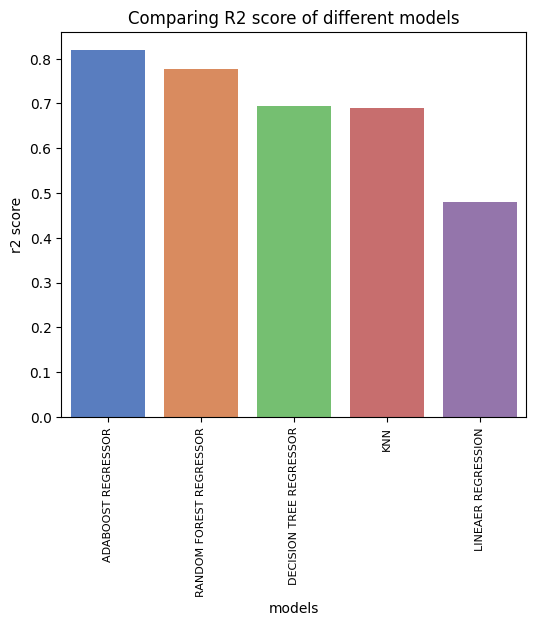

In [ ]:
#comparing r2 score diagram
plt.figure(figsize=(6,5))
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x=fine_model['model'], y=fine_model['R2 score'], data=fine_model, palette='muted')
plt.xlabel("models")
plt.ylabel("r2 score")
plt.title("Comparing R2 score of different models")
plt.show()

#**BEST MODEL CROSS VALIDATION (ADABOOST REGRESSOR)**

In [ ]:
#BEST MODEL COSS VALIDATION ADABOOST REGRESSOR

from sklearn.model_selection import cross_val_score
model = AdaBoostRegressor(n_estimators=101, random_state=42)
scores = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [0.88526993 0.80315931 0.79293871 0.72812356 0.89269814 0.8145333
 0.83692699 0.86033671 0.82111253 0.81336147]
Average Cross-Validation Score: 0.8248460656329464


##**The ADABOOST REGRESSOR stands out as the top-performing model, achieving the highest r2 score.**

In [ ]:
import pickle
pickle.dump(model_4,open('model.sav','wb'))